## Machine learning 
### Trying classical ML models to predict epilepsy from 5s EEG segments 



### 1. Import and read file

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [32]:
df = pd.read_csv("eeg_features_updated.csv")
display(df.head())
display(df.shape)

,epoch,subject_id,age,gender,epilepsy,EEG_F7-REF_mean,EEG_F7-REF_var,EEG_F7-REF_skew,EEG_F7-REF_kurtosis,EEG_F7-REF_zcr,...,EEG_CZ-REF_D4_entropy,EEG_CZ-REF_D3_energy,EEG_CZ-REF_D3_var,EEG_CZ-REF_D3_entropy,EEG_CZ-REF_D2_energy,EEG_CZ-REF_D2_var,EEG_CZ-REF_D2_entropy,EEG_CZ-REF_D1_energy,EEG_CZ-REF_D1_var,EEG_CZ-REF_D1_entropy
0,75,aaaaaigj,82,F,0,0.010342,0.569661,0.013694,2.804483,0.073659,...,5.419549,100.354538,0.619097,6.279751,11.493160,0.036256,7.378593,0.405705,0.000646,8.191127
1,136,aaaaaigj,82,F,0,-0.000279,0.552727,0.344468,2.871225,0.070456,...,5.288272,115.892805,0.715353,6.085417,29.526070,0.093142,7.325540,1.288355,0.002052,8.355953
2,67,aaaaaigj,82,F,0,-0.003751,0.473113,-0.518497,4.171455,0.073659,...,5.180132,55.571159,0.341626,5.558087,12.428270,0.039206,7.268168,0.370081,0.000589,8.279753
3,200,aaaaaigj,82,F,0,0.004243,0.735107,0.197985,3.076141,0.046437,...,5.260772,58.675519,0.362067,6.021273,17.881630,0.056407,7.299770,0.565185,0.000900,8.094452
4,108,aaaaaigj,82,F,0,0.007374,6.316124,-2.595324,20.265543,0.056045,...,5.141014,264.371187,1.622120,4.522255,670.763266,2.115950,3.811304,29.716604,0.047319,4.830533


(380, 145)

In [3]:
df.describe()

,epoch,age,epilepsy,EEG_F7-REF_mean,EEG_F7-REF_var,EEG_F7-REF_skew,EEG_F7-REF_kurtosis,EEG_F7-REF_zcr,EEG_F7-REF_tkeo,EEG_F7-REF_delta_power,...,EEG_CZ-REF_D4_entropy,EEG_CZ-REF_D3_energy,EEG_CZ-REF_D3_var,EEG_CZ-REF_D3_entropy,EEG_CZ-REF_D2_energy,EEG_CZ-REF_D2_var,EEG_CZ-REF_D2_entropy,EEG_CZ-REF_D1_energy,EEG_CZ-REF_D1_var,EEG_CZ-REF_D1_entropy
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,3.800000e+02,380.000000
mean,130.547368,56.421053,0.526316,0.000677,0.824250,-0.013454,4.074618,0.093761,0.148135,0.372156,...,5.148761,124.442736,0.765359,6.036689,63.866373,0.201461,7.068802,4.308719,6.860994e-03,8.117753
std,97.775362,16.221800,0.499965,0.019006,0.865466,0.486219,2.876285,0.041801,0.239634,0.163230,...,0.362200,135.776567,0.833346,0.563768,126.197134,0.398078,0.599775,12.594230,2.005441e-02,0.600949
min,0.000000,20.000000,0.000000,-0.079664,0.000420,-2.969100,2.199967,0.009608,0.000029,0.043068,...,1.598173,0.007667,0.000047,1.610055,0.001824,0.000006,2.317982,0.000067,1.059903e-07,3.199559
25%,46.000000,47.000000,0.000000,-0.007600,0.230105,-0.189092,3.007716,0.064051,0.020943,0.245908,...,5.060410,11.441919,0.070601,6.036120,4.082908,0.012880,7.041401,0.184155,2.932387e-04,8.095110
50%,108.000000,55.000000,1.000000,0.000348,0.696003,-0.010744,3.315810,0.082466,0.076139,0.352988,...,5.219633,86.514787,0.533811,6.166504,18.738203,0.059110,7.190458,0.682878,1.087383e-03,8.196701
75%,209.250000,70.000000,1.000000,0.008993,1.099764,0.145727,3.962878,0.115492,0.172927,0.492893,...,5.332168,172.786178,1.064789,6.285407,53.242565,0.167956,7.286822,2.847051,4.533518e-03,8.269319
max,495.000000,83.000000,1.000000,0.083261,6.316124,2.635946,30.274321,0.215372,2.070185,0.795822,...,5.585658,647.743738,3.948438,6.509356,1235.974341,3.898551,7.820930,163.536119,2.604064e-01,8.849675


In [33]:
# Check number of patients per class
df.groupby('epilepsy')['subject_id'].nunique()


epilepsy
0     9
1    10
Name: subject_id, dtype: int64

In [34]:
# check number of 5-sec EEG sessions per class
df.groupby('epilepsy')['epoch'].count()

epilepsy
0    180
1    200
Name: epoch, dtype: int64

### 2. Prepare the dataset for ML:
- Drop useless columns (ids, irrelevant for the model, etc)
- Separate labels from features (X, y)
- Train test split
- Sci-kit learn pre-processing: 
-> Standardize of numerical variables  
-> One-hot-encode of categorical variables

In [35]:
from sklearn.model_selection import StratifiedGroupKFold

# Drop useless columns for the model
df = df.drop("epoch", axis=1)

# Define the target 
target_name = "epilepsy"

# Patient-level train/test split
""" Splitting by unique subject ID (and not simply by individual samples since multiple samples can come from the same patient) 
To guarantee that no data from the same patient appears in both train and test sets
This is critical to prevent patient-level leakage and evaluate generalization to new patients in clinical settings
"""
# Inputs for splitting
X = df.drop(columns=[target_name])
y = df[target_name]
groups = df["subject_id"]

# StratifiedGroupKFold split to avoid patient leakage
sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in sgkf.split(X, y, groups):
    train_df = df.iloc[train_idx]
    test_df = df.iloc[test_idx]
    break  # Use only the first fold

# Features and labels
X_train, Y_train = train_df.drop(columns=target_name), train_df[target_name]
X_test, Y_test = test_df.drop(columns=target_name), test_df[target_name]


######################## Sci-kit Learn Preprocessing #####################

## Drop patient IDs now
X_train = X_train.drop("subject_id", axis=1)
X_test = X_test.drop("subject_id", axis=1)

# Automatically detect names of numeric/categorical columns
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=object).columns.tolist()

# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])

# Create pipeline for categorical features
categorical_transformer = Pipeline(steps=[
        ("encoder",OneHotEncoder(drop="first"))
        # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Preprocessings on train set
X_train_transformed = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test_transformed = preprocessor.transform(X_test)

print(f"Train shape: {X_train_transformed.shape}, Test shape: {X_test_transformed.shape}")


Train shape: (300, 142), Test shape: (80, 142)


### Call function to log model scores locally

In [36]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Initialize your tracking DataFrame
results_df = pd.DataFrame(columns=[
    "model_name", 
    "train_accuracy", "test_accuracy", 
    "train_f1", "test_f1", 
    "train_sensitivity", "test_sensitivity", 
    "train_specificity", "test_specificity"
])

def log_model_performance(model_name, y_train, y_train_pred, y_test, y_test_pred, results_df):
    def compute_metrics(y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        sensitivity = recall_score(y_true, y_pred, pos_label=1)  # Recall for class 1
        specificity = recall_score(y_true, y_pred, pos_label=0)  # Recall for class 0
        return acc, f1, sensitivity, specificity

    train_metrics = compute_metrics(y_train, y_train_pred)
    test_metrics = compute_metrics(y_test, y_test_pred)

    # Append to results_df
    results_df = pd.concat([results_df, pd.DataFrame([{
        "model_name": model_name,
        "train_accuracy": train_metrics[0],
        "test_accuracy": test_metrics[0],
        "train_f1": train_metrics[1],
        "test_f1": test_metrics[1],
        "train_sensitivity": train_metrics[2],
        "test_sensitivity": test_metrics[2],
        "train_specificity": train_metrics[3],
        "test_specificity": test_metrics[3],
    }])], ignore_index=True)

    return results_df


### Baseline Model: Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression 
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_transformed, Y_train)

# Predict class labels
Y_train_pred = classifier.predict(X_train_transformed)
Y_test_pred = classifier.predict(X_test_transformed)

# Log performance
results_df = log_model_performance("LogReg_baseline", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)
results_df

/var/folders/g2/7q8py5px6xqbgjxm64g6_xcc0000gp/T/ipykernel_26122/290654043.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,0.956667,0.675,0.959502,0.682927,0.9625,0.7,0.95,0.65


In [38]:
from sklearn.model_selection import cross_val_score
# Check the average score with a cross-validation (here using K=10)
scores = cross_val_score(classifier, X_train_transformed , Y_train, cv=10)
avg = scores.mean()
std = scores.std()

print(avg)
print(std)

0.7633333333333333
0.1196754871401083


L2 regularization (Ridge) to address overfitting

In [42]:
# Train logistic regression with L1 reg
classifier_L2 = LogisticRegression(
    penalty='l1',           # Lasso regularization
    C=0.01,                  # Smaller C = stronger regularization
    solver='liblinear',         # or 'saga' for large data
    max_iter=1000,
    random_state=42,
)

classifier_L2.fit(X_train_transformed, Y_train)

# Predict class labels
Y_train_pred = classifier_L2.predict(X_train_transformed)
Y_test_pred = classifier_L2.predict(X_test_transformed)

# Log performance
results_df = log_model_performance("LogReg_L1regularization", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)
results_df

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,0.956667,0.6750,0.959502,0.682927,0.9625,0.7,0.95,0.650
1,LogReg_L1regularization,0.533333,0.5000,0.695652,0.666667,1.0000,1.0,0.00,0.000
2,LogReg_GridSearch,0.950000,0.6875,0.952978,0.691358,0.9500,0.7,0.95,0.675
3,LogReg_L1regularization,0.466667,0.5000,0.000000,0.000000,0.0000,0.0,1.00,1.000


In [43]:
# Perform grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.4, 0.5, 0.6, 0.7],       # Regularization strength
    "penalty": ["l2"],               # Type of regularization
    "solver": ["liblinear"],              # Solver that supports both l1 and l2
}

# Best params 1: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

gridsearch = GridSearchCV(classifier, param_grid = param_grid, cv = 3) 
gridsearch.fit(X_train_transformed, Y_train)

Y_train_pred = gridsearch.predict(X_train_transformed)
Y_test_pred = gridsearch.predict(X_test_transformed)

print("\n✅ Best Parameters:", gridsearch.best_params_)
print("Best CV F1-score :", gridsearch.best_score_)

results_df = log_model_performance("LogReg_GridSearch", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)



✅ Best Parameters: {'C': 0.7, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1-score : 0.5499999999999999


In [44]:
results_df

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,0.956667,0.6750,0.959502,0.682927,0.9625,0.700,0.95,0.650
1,LogReg_L1regularization,0.533333,0.5000,0.695652,0.666667,1.0000,1.000,0.00,0.000
2,LogReg_GridSearch,0.950000,0.6875,0.952978,0.691358,0.9500,0.700,0.95,0.675
3,LogReg_L1regularization,0.466667,0.5000,0.000000,0.000000,0.0000,0.000,1.00,1.000
4,LogReg_GridSearch,0.956667,0.7000,0.959502,0.707317,0.9625,0.725,0.95,0.675


### Results from logistic regression:
* Regularization did not reduce overfitting significantly. 

* We will try reducing dimension as there are currently many features. 

* Then we will try alternative models that may be more suitable to capture non-linear patterns in EEG better.

### Dimension reduction to reduce overfitting: 
* PCA

In [45]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

print(f"Reduced to {X_train_pca.shape[1]} components")
# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Reduced to 23 components
Explained variance ratio: [0.25439452 0.13714254 0.12003691 0.08911867 0.03600302 0.03273957
 0.02887052 0.02659957 0.01996601 0.01921612 0.01740675 0.01602637
 0.0137296  0.01198634 0.01135852 0.01082241 0.01015873 0.0090017
 0.00868352 0.00830815 0.006785   0.00632073 0.00578966]


In [46]:
# 1. Create column names for PCA components
selected_feature_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
print("Selected PCA components:", selected_feature_cols)

# 2. Turn the PCA output into a DataFrame
pca_df = pd.DataFrame(X_test_pca, columns=selected_feature_cols)

# 3. Add PCA features to your segment-level DataFrame
segment_df = df.reset_index(drop=True)  # Just in case
segment_df = pd.concat([segment_df, pca_df], axis=1)


Selected PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23']


#### Try logistic regression again after PCA

In [47]:
# Train logistic regression again with L2 reg
classifier_2 = LogisticRegression()

classifier_2 .fit(X_train_pca, Y_train)

# Predict class labels
Y_train_pred = classifier_2.predict(X_train_pca)
Y_test_pred = classifier_2.predict(X_test_pca)

# Log performance
results_df = log_model_performance("LogReg_2_pca", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)
results_df

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,0.956667,0.6750,0.959502,0.682927,0.96250,0.700,0.950000,0.650
1,LogReg_L1regularization,0.533333,0.5000,0.695652,0.666667,1.00000,1.000,0.000000,0.000
2,LogReg_GridSearch,0.950000,0.6875,0.952978,0.691358,0.95000,0.700,0.950000,0.675
3,LogReg_L1regularization,0.466667,0.5000,0.000000,0.000000,0.00000,0.000,1.000000,1.000
4,LogReg_GridSearch,0.956667,0.7000,0.959502,0.707317,0.96250,0.725,0.950000,0.675
5,LogReg_2_pca,0.770000,0.8000,0.786378,0.794872,0.79375,0.775,0.742857,0.825


Try cross-validation

In [48]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, confusion_matrix
import numpy as np

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) != 0 else 0

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',   # Sensitivity
    'f1': 'f1_macro',
    'specificity': make_scorer(specificity_score)
}

cv = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)

scores = cross_validate(
    classifier_2, 
    X_train_pca, 
    Y_train, 
    scoring=scoring, 
    cv=cv, 
    return_train_score=True
)

for metric in scores:
    if 'train_' in metric or 'test_' in metric:
        print(f"{metric}: Mean={scores[metric].mean():.4f}, Std={scores[metric].std():.4f}")


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


test_accuracy: Mean=0.7200, Std=0.1614
train_accuracy: Mean=0.7708, Std=0.0078
test_precision: Mean=0.7343, Std=0.1980
train_precision: Mean=0.7700, Std=0.0078
test_recall: Mean=0.7208, Std=0.1682
train_recall: Mean=0.7692, Std=0.0077
test_f1: Mean=0.6988, Std=0.1812
train_f1: Mean=0.7695, Std=0.0078
test_specificity: Mean=0.7133, Std=0.2729
train_specificity: Mean=0.7449, Std=0.0096


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Results of regularization and reducing dimensions:
* Performance improves and overfitting reduces
* Cross-val scores are pretty good (k=50)
-> sensitivity: train=0.76 / test=0.72
-> specificity: train=0.74 / test=0.71


### Confusion matrix and ROC curves

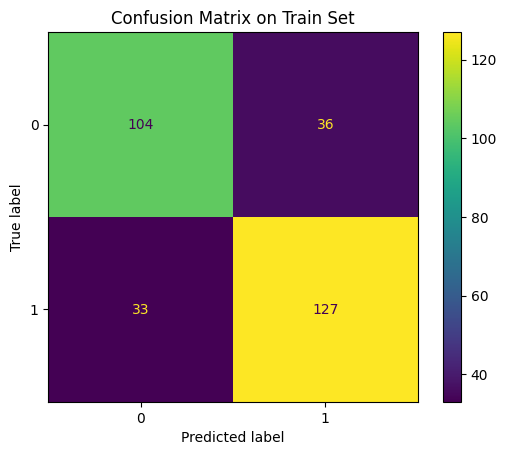

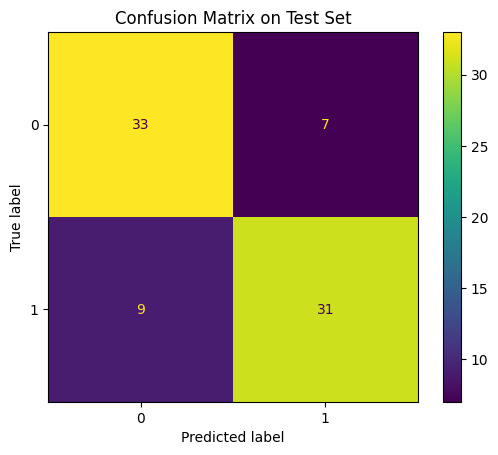

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Confusion matrix on training set
fig, ax = plt.subplots()
ax.set_title("Confusion Matrix on Train Set")
ConfusionMatrixDisplay.from_estimator(classifier_2, X_train_pca, Y_train, ax=ax)
plt.show()

# Confusion matrix on test set
fig, ax = plt.subplots()
ax.set_title("Confusion Matrix on Test Set")
ConfusionMatrixDisplay.from_estimator(classifier_2, X_test_pca, Y_test, ax=ax)
plt.show()


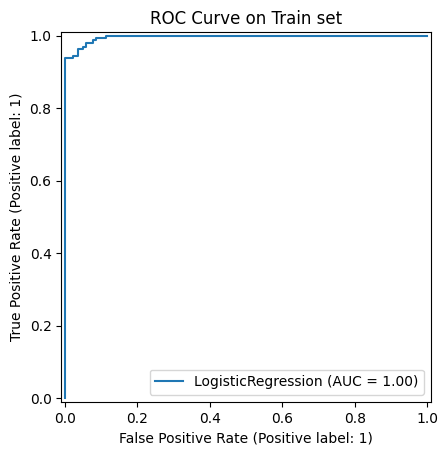

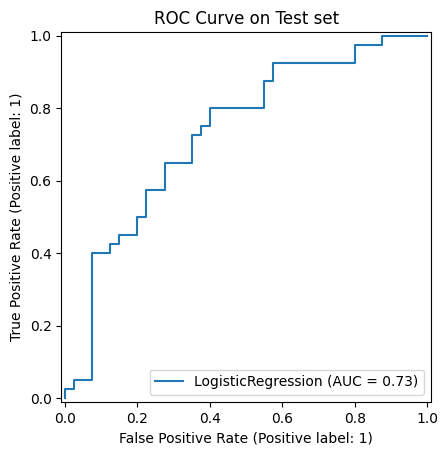

In [50]:
# Visualize ROC curves
_ , ax = plt.subplots() 
ax.set_title("ROC Curve on Train set") 
RocCurveDisplay.from_estimator(classifier, X_train_transformed, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots() 
ax.set_title("ROC Curve on Test set") 
RocCurveDisplay.from_estimator(classifier, X_test_transformed, Y_test, ax=ax) 
plt.show()


### XGBoost

In [52]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

# --- Custom specificity scorer ---
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) != 0 else 0

# --- Scoring dictionary for CV ---
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'specificity': make_scorer(specificity_score)
}

# --- Cross-validation ---
cv = StratifiedKFold(n_splits=75, shuffle=True, random_state=42)
xgb_cv = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
cv_scores = cross_validate(
    xgb_cv,
    X_train_pca,
    Y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=True
)

# --- Log CV scores into results_df as "XGBoostCV" ---
results_df = pd.concat([results_df, pd.DataFrame([{
    "model_name": "XGBoostCV",
    "train_accuracy": cv_scores['train_accuracy'].mean(),
    "test_accuracy": cv_scores['test_accuracy'].mean(),
    "train_f1": cv_scores['train_f1'].mean(),
    "test_f1": cv_scores['test_f1'].mean(),
    "train_sensitivity": cv_scores['train_recall'].mean(),  # Recall for class 1
    "test_sensitivity": cv_scores['test_recall'].mean(),
    "train_specificity": cv_scores['train_specificity'].mean(),
    "test_specificity": cv_scores['test_specificity'].mean(),
}])], ignore_index=True)

# --- Train on full train set + predict ---
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train_pca, Y_train)

Y_train_pred = xgboost.predict(X_train_pca)
Y_test_pred = xgboost.predict(X_test_pca)

# --- Log actual predictions ---
results_df = log_model_performance("XGBoost_pca", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)

# --- Final results ---
results_df


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:40:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/li

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,0.956667,0.675000,0.959502,0.682927,0.96250,0.700000,0.950000,0.650000
1,LogReg_L1regularization,0.533333,0.500000,0.695652,0.666667,1.00000,1.000000,0.000000,0.000000
2,LogReg_GridSearch,0.950000,0.687500,0.952978,0.691358,0.95000,0.700000,0.950000,0.675000
3,LogReg_L1regularization,0.466667,0.500000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
4,LogReg_GridSearch,0.956667,0.700000,0.959502,0.707317,0.96250,0.725000,0.950000,0.675000
5,LogReg_2_pca,0.770000,0.800000,0.786378,0.794872,0.79375,0.775000,0.742857,0.825000
6,XGBoostCV,1.000000,0.773333,1.000000,0.756444,1.00000,0.776667,1.000000,0.746667
7,XGBoost_pca,1.000000,0.712500,1.000000,0.722892,1.00000,0.750000,1.000000,0.675000


#### Gridsearch

In [55]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Parameter grid
param_grid = {
    "n_estimators": [90, 100, 110],
    "learning_rate": [0.15, 0.2, 0.3],
    "subsample": [0.2, 0.3, 0.4],
    "colsample_bytree": [0.2, 0.3],
}

# Best params log
# ✅ Best Parameters: {'colsample_bytree': 0.2, 'learning_rate': 0.15, 'n_estimators': 110, 'subsample': 0.4}

# Grid search setup
grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_grid=param_grid,
    scoring=make_scorer(roc_auc_score),
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1,
)

# Train model
grid.fit(X_train_pca, Y_train)

# Predictions
Y_train_pred = grid.predict(X_train_pca)
Y_test_pred = grid.predict(X_test_pca)

# Log performance
results_df = log_model_performance(
    "XGBoost_GridSearch",
    Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    results_df,
)

# Output best params and score
print("\n✅ Best Parameters:", grid.best_params_)
print("Best CV ROC AUC:", grid.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:44:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/li


✅ Best Parameters: {'colsample_bytree': 0.2, 'learning_rate': 0.15, 'n_estimators': 100, 'subsample': 0.4}
Best CV ROC AUC: 0.7623579615547803


In [56]:
results_df

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,0.956667,0.675000,0.959502,0.682927,0.96250,0.700000,0.950000,0.650000
1,LogReg_L1regularization,0.533333,0.500000,0.695652,0.666667,1.00000,1.000000,0.000000,0.000000
2,LogReg_GridSearch,0.950000,0.687500,0.952978,0.691358,0.95000,0.700000,0.950000,0.675000
3,LogReg_L1regularization,0.466667,0.500000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
4,LogReg_GridSearch,0.956667,0.700000,0.959502,0.707317,0.96250,0.725000,0.950000,0.675000
5,LogReg_2_pca,0.770000,0.800000,0.786378,0.794872,0.79375,0.775000,0.742857,0.825000
6,XGBoostCV,1.000000,0.773333,1.000000,0.756444,1.00000,0.776667,1.000000,0.746667
7,XGBoost_pca,1.000000,0.712500,1.000000,0.722892,1.00000,0.750000,1.000000,0.675000
8,XGBoost_GridSearch,1.000000,0.675000,1.000000,0.682927,1.00000,0.700000,1.000000,0.650000
9,XGBoost_GridSearch,1.000000,0.662500,1.000000,0.682353,1.00000,0.725000,1.000000,0.600000


### Aggregation function for patient-level predictions

In [57]:
def aggregate_predictions_by_recording(model, segment_df, feature_cols, 
                                       id_col='subject_id', threshold=0.5, label_col='epilepsy'):
    """
    Aggregates 5s EEG segment-level predictions into recording-level predictions.

    Parameters:
    - model: Trained classifier with .predict_proba()
    - segment_df: DataFrame with 5s segments and associated metadata (e.g. subject_id, label)
    - feature_cols: List of EEG channel features used for prediction
    - id_col: Column name identifying each EEG recording (e.g., 'subject_id' or 'edf_path')
    - threshold: Probability threshold for binary classification
    - label_col: Name of ground-truth label column (default 'epilepsy')

    Returns:
    - agg_df: DataFrame with one row per EEG file, with:
        - subject_id / edf_path
        - number_of_segments
        - mean_probability
        - predicted_label
        - true_label
    """

    segment_df = segment_df.copy()

    # Get segment-level probabilities for class 1 (epilepsy)
    segment_df['prob_epilepsy'] = model.predict_proba(segment_df[feature_cols])[:, 1]

    # Group by EEG recording
    agg_results = []

    for recording_id, group in segment_df.groupby(id_col):
        probs = group['prob_epilepsy'].values
        mean_prob = probs.mean()
        pred_label = int(mean_prob >= threshold)

        record = {
            id_col: recording_id,
            'number_of_segments': len(probs),
            'mean_probability': mean_prob,
            'predicted_label': pred_label
        }

        # Add true label if available
        if label_col in group.columns:
            record['true_label'] = group[label_col].iloc[0]

        agg_results.append(record)

    return pd.DataFrame(agg_results)

Call the function

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Parameter grid
param_grid = {
    "n_estimators": [90, 100, 110],
    "learning_rate": [0.15, 0.2, 0.3],
    "subsample": [0.2, 0.3, 0.4],
    "colsample_bytree": [0.2, 0.3],
}

# Grid search setup
grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_grid=param_grid,
    scoring=make_scorer(roc_auc_score),
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1,
)

# Train the best model
grid.fit(X_train_pca, Y_train)

# Aggregate segment-level predictions to patient/recording-level
test_df = test_df.reset_index(drop=True)
test_df_pca = pd.concat([test_df, pca_df], axis=1)

agg_df = aggregate_predictions_by_recording(
    model=grid,
    segment_df=test_df_pca,
    feature_cols=selected_feature_cols,
    id_col='subject_id',
    threshold=0.5
)

y_true = agg_df['true_label']
y_pred = agg_df['predicted_label']

# Evaluation function
def eval_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return acc, f1, precision, recall

# Calculate metrics
acc, f1, precision, recall = eval_metrics(y_true, y_pred)
conf_mat = confusion_matrix(y_true, y_pred)

# Print results
print("📊 Recording-Level Evaluation")
print(f"- Accuracy:    {acc:.4f}")
print(f"- Sensitivity: {recall:.4f}")
print(f"- Specificity: {recall_score(y_true, y_pred, pos_label=0):.4f}")
print(f"- F1 Score:    {f1:.4f}")
print("🧠 Confusion Matrix:")
print(conf_mat)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:49:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:49:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:49:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/myenv/li

📊 Recording-Level Evaluation
- Accuracy:    1.0000
- Sensitivity: 1.0000
- Specificity: 1.0000
- F1 Score:    1.0000
🧠 Confusion Matrix:
[[2 0]
 [0 2]]
